# Options Strategies, Portfolio Optimization and Risk Management

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Load the Libs we need

In [1]:
# import Lib
import pandas as pd
import datetime as dt
import pytz
import os
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as si
import math
import networkx as nx

# import module
from datetime import datetime, timezone
from datetime import date, time
from math import trunc
from dateutil.parser import parse

## Introduction to Portfolio Optimization and Risk Management

In [2]:
import numpy as np

# Suppose we have two AAPL options with the following expected returns and standard deviations:
# Option1: Expected Return = 0.08, Standard Deviation = 0.2
# Option2: Expected Return = 0.12, Standard Deviation = 0.3

# Portfolio weights (50% in each option)
weights = np.array([0.5, 0.5])

# Expected returns and standard deviations
returns = np.array([0.08, 0.12])
std_devs = np.array([0.2, 0.3])

# Calculate portfolio expected return and standard deviation
port_return = np.dot(weights, returns)
port_std_dev = np.sqrt(np.dot(weights**2, std_devs**2))

print(f"Portfolio Expected Return: {port_return:.2f}")
print(f"Portfolio Standard Deviation: {port_std_dev:.2f}")


Portfolio Expected Return: 0.10
Portfolio Standard Deviation: 0.18


In [3]:
import numpy as np
from scipy.optimize import minimize

# Sample returns and covariance matrix for two AAPL options
returns = np.array([0.08, 0.12])
cov_matrix = np.array([[0.04, 0.02], [0.02, 0.09]])  # Assuming some covariance between the options

def negative_sharpe(weights): 
    port_return = np.dot(weights, returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -port_return / port_volatility

# Constraints and bounds
cons = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}) 
bounds = ((0, 1), (0, 1))
initial_weights = [0.5, 0.5]

solution = minimize(negative_sharpe, initial_weights, method='SLSQP', bounds=bounds, constraints=cons)
optimal_weights = solution.x

print(f"Optimal Weights: {optimal_weights}")


Optimal Weights: [0.59920317 0.40079683]


## Diversification and Modern Portfolio Theory in Options Trading

In [4]:
# Assuming a correlation of -0.5 between the two options
correlation = -0.5
covariance = correlation * std_devs[0] * std_devs[1]

# Portfolio variance formula considering covariance
port_variance = weights[0]**2 * std_devs[0]**2 + weights[1]**2 * std_devs[1]**2 + 2 * weights[0] * weights[1] * covariance
port_std_dev_diversified = np.sqrt(port_variance)

print(f"Portfolio Standard Deviation with Diversification: {port_std_dev_diversified:.2f}")


Portfolio Standard Deviation with Diversification: 0.13


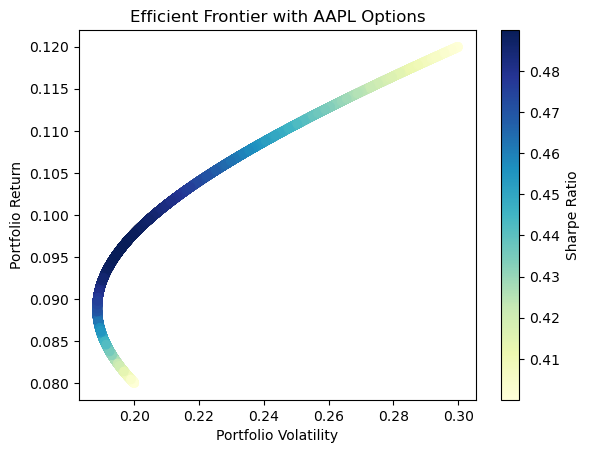

In [5]:
import matplotlib.pyplot as plt

num_portfolios = 10000
results = np.zeros((3, num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(2)
    weights /= np.sum(weights)
    
    port_return = np.dot(weights, returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    results[0,i] = port_return
    results[1,i] = port_volatility
    results[2,i] = results[0,i] / results[1,i]  # Sharpe Ratio

# Plotting
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier with AAPL Options')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()


## Constructing Efficient Portfolios with Python

In [6]:
import pandas as pd
# For simplicity, let's assume we already have a dataframe with AAPL options data
# df_options = pd.read_csv('AAPL_options_data.csv')

# Sample DataFrame (Replace this with actual data)
data = {
    'Option': ['AAPL_Call_150', 'AAPL_Put_140'],
    'Price': [10, 8],
    'Expected_Return': [0.08, 0.12]
}
df_options = pd.DataFrame(data)

# Create a portfolio with equal weight to each option
df_options['Weight'] = 0.5

# Calculate portfolio cost
df_options['Investment'] = df_options['Weight'] * df_options['Price']
portfolio_cost = df_options['Investment'].sum()

print(df_options)
print(f"Total Portfolio Cost: ${portfolio_cost}")


          Option  Price  Expected_Return  Weight  Investment
0  AAPL_Call_150     10             0.08     0.5         5.0
1   AAPL_Put_140      8             0.12     0.5         4.0
Total Portfolio Cost: $9.0


Optimal Weights: [4.16333634e-17 4.68375339e-16 1.00000000e+00]


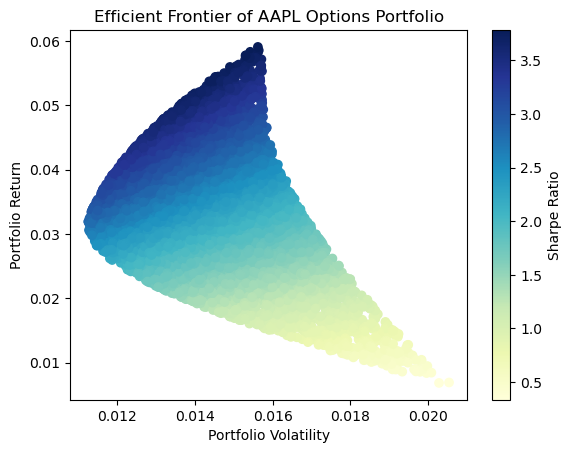

In [13]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Mocking a dataset of AAPL options with historical returns
data = {
    'AAPL_Call_150': [0.02, 0.03, 0.04, 0.03, 0.05],
    'AAPL_Put_140': [-0.01, -0.02, 0.02, 0.03, 0.01],
    'AAPL_Call_155': [0.04, 0.05, 0.06, 0.07, 0.08]
}
df = pd.DataFrame(data)

# Calculate mean returns and covariance matrix
mean_returns = df.mean()
cov_matrix = df.cov()

# Objective function to maximize the Sharpe Ratio
def negative_sharpe(weights): 
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -port_return / port_volatility

# Constraints and bounds for three assets
cons = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}) 
bounds = ((0, 1), (0, 1), (0, 1))
initial_weights = [1/3, 1/3, 1/3]

# Optimization to find the optimal weights
solution = minimize(negative_sharpe, initial_weights, method='SLSQP', bounds=bounds, constraints=cons)
optimal_weights = solution.x

print(f"Optimal Weights: {optimal_weights}")

# Visualize Efficient Frontier
portfolio_returns = []
portfolio_volatilities = []
for _ in range(10000):
    weights = np.random.random(3)
    weights /= np.sum(weights)
    
    port_return = np.dot(weights, mean_returns)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    portfolio_returns.append(port_return)
    portfolio_volatilities.append(port_vol)

plt.scatter(portfolio_volatilities, portfolio_returns, c=[r/v for r, v in zip(portfolio_returns, portfolio_volatilities)], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier of AAPL Options Portfolio')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()


## Options Strategies and Risk Management Techniques in Options Trading

In [8]:
# Assuming we own AAPL stock and we write/sell a call option
stock_price = 145
call_strike = 150
call_premium = 5

# Profit if option is not exercised
profit_not_exercised = call_premium

# Profit if option is exercised
profit_exercised = call_premium + (call_strike - stock_price)

print(f"Profit if Option Not Exercised: ${profit_not_exercised}")
print(f"Profit if Option Exercised: ${profit_exercised}")


Profit if Option Not Exercised: $5
Profit if Option Exercised: $10


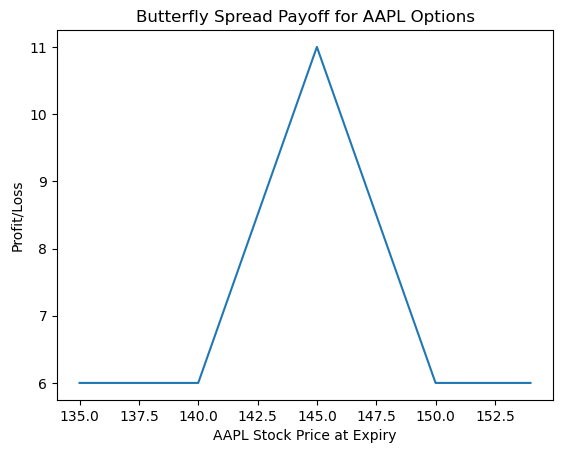

In [9]:
# Butterfly Spread: Long 1 lower strike, Short 2 middle strike, Long 1 higher strike
lower_strike = 140
middle_strike = 145
higher_strike = 150

premium_lower = 5
premium_middle = 7
premium_higher = 3

def butterfly_payoff(stock_price):
    return (max(stock_price - lower_strike, 0) - 2 * max(stock_price - middle_strike, 0) 
            + max(stock_price - higher_strike, 0) - premium_lower + 2 * premium_middle - premium_higher)

stock_prices = np.arange(135, 155, 1)
payoffs = [butterfly_payoff(s) for s in stock_prices]

plt.plot(stock_prices, payoffs)
plt.title('Butterfly Spread Payoff for AAPL Options')
plt.xlabel('AAPL Stock Price at Expiry')
plt.ylabel('Profit/Loss')
plt.show()


## Integrating Risk Management into Trading Strategies

In [10]:
# Assuming portfolio follows a normal distribution
# For simplicity, using the previously calculated portfolio standard deviation (port_std_dev)

confidence_level = 0.95
from scipy.stats import norm

VaR = port_return - norm.ppf(confidence_level) * port_std_dev

print(f"Value at Risk at 95% Confidence Level: ${VaR:.2f}")


Value at Risk at 95% Confidence Level: $-0.20


In [12]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd

np.random.seed(42)  # for reproducibility

# Mock returns and covariance matrix for three AAPL options
returns = np.array([0.08, 0.12, 0.07])
cov_matrix = np.array([[0.04, 0.02, 0.01], 
                       [0.02, 0.09, 0.03], 
                       [0.01, 0.03, 0.05]]) 

# Objective function to maximize the Sharpe Ratio
def negative_sharpe(weights): 
    port_return = np.dot(weights, returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -port_return / port_volatility

# Constraints and bounds for three options
cons = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}) 
bounds = ((0, 1), (0, 1), (0, 1))
initial_weights = [1/3, 1/3, 1/3]  # Evenly distributed for the start

# Optimization
solution = minimize(negative_sharpe, initial_weights, method='SLSQP', bounds=bounds, constraints=cons)
optimal_weights = solution.x

# Monte Carlo Simulation for VaR
num_simulations = 10000
simulation_results = np.zeros(num_simulations)

for i in range(num_simulations):
    random_returns = np.random.multivariate_normal(mean_returns, cov_matrix)
    portfolio_return = np.dot(optimal_weights, random_returns)
    simulation_results[i] = portfolio_return

# Calculate VaR at 95% confidence level
VaR_95 = np.percentile(simulation_results, 5)
print(f"Value at Risk (VaR) at 95% Confidence Level: ${VaR_95:.2f}")


Value at Risk (VaR) at 95% Confidence Level: $-0.26
